Mean Squared Error: 0.16260657734470157
Accuracy: 0.8373934226552984
Confusion Matrix:
[[642 166]
 [101 733]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       808
           1       0.82      0.88      0.85       834

    accuracy                           0.84      1642
   macro avg       0.84      0.84      0.84      1642
weighted avg       0.84      0.84      0.84      1642



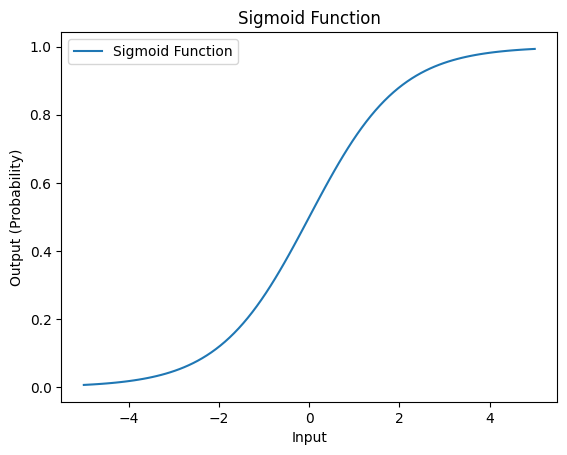

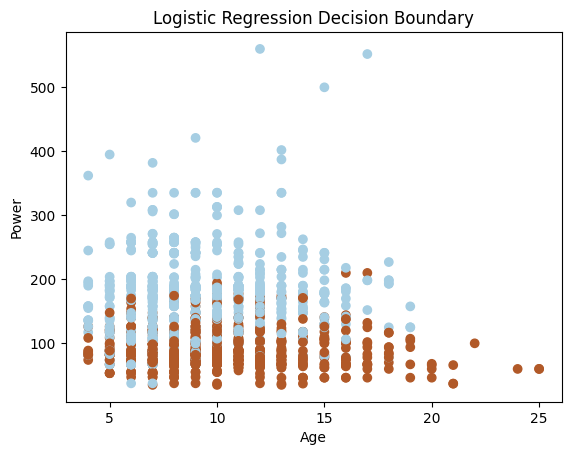

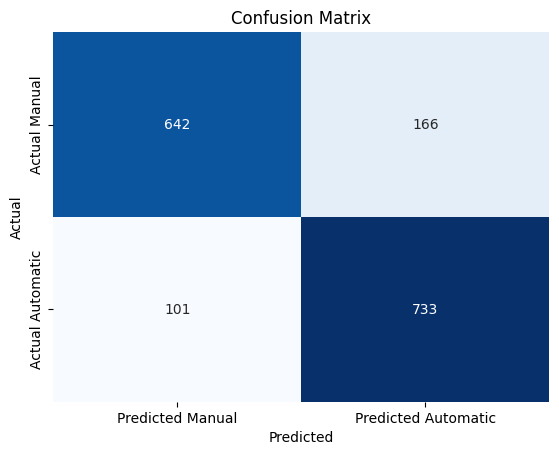

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

df = pd.read_csv('clean-train.csv')

label_encoder = LabelEncoder()
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

X = df[['Age', 'Mileage', 'Engine', 'Power', 'Seats']]
y = df['Transmission']

sampler = RandomOverSampler(sampling_strategy='minority')  
X_resampled, y_resampled = sampler.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]


threshold = 0.5  
y_pred = (y_pred_prob > threshold).astype(int)


from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print("Accuracy:", accuracy)

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


sigmoid_function = lambda x: 1 / (1 + np.exp(-x))

x_values = np.linspace(-5, 5, 100)
plt.plot(x_values, sigmoid_function(x_values), label='Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output (Probability)')
plt.title('Sigmoid Function')
plt.legend()
plt.show()
plt.scatter(X_test['Age'], X_test['Power'], c=y_test, cmap=plt.cm.Paired)
plt.xlabel('Age')
plt.ylabel('Power')
plt.title('Logistic Regression Decision Boundary')
plt.show()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Manual', 'Predicted Automatic'],
            yticklabels=['Actual Manual', 'Actual Automatic'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
